In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('voice.csv')

In [6]:
# Encode target variable
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male=1, female=0

# Split dataset
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 2. Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {initial_accuracy:.4f}')

Initial Accuracy: 0.9259


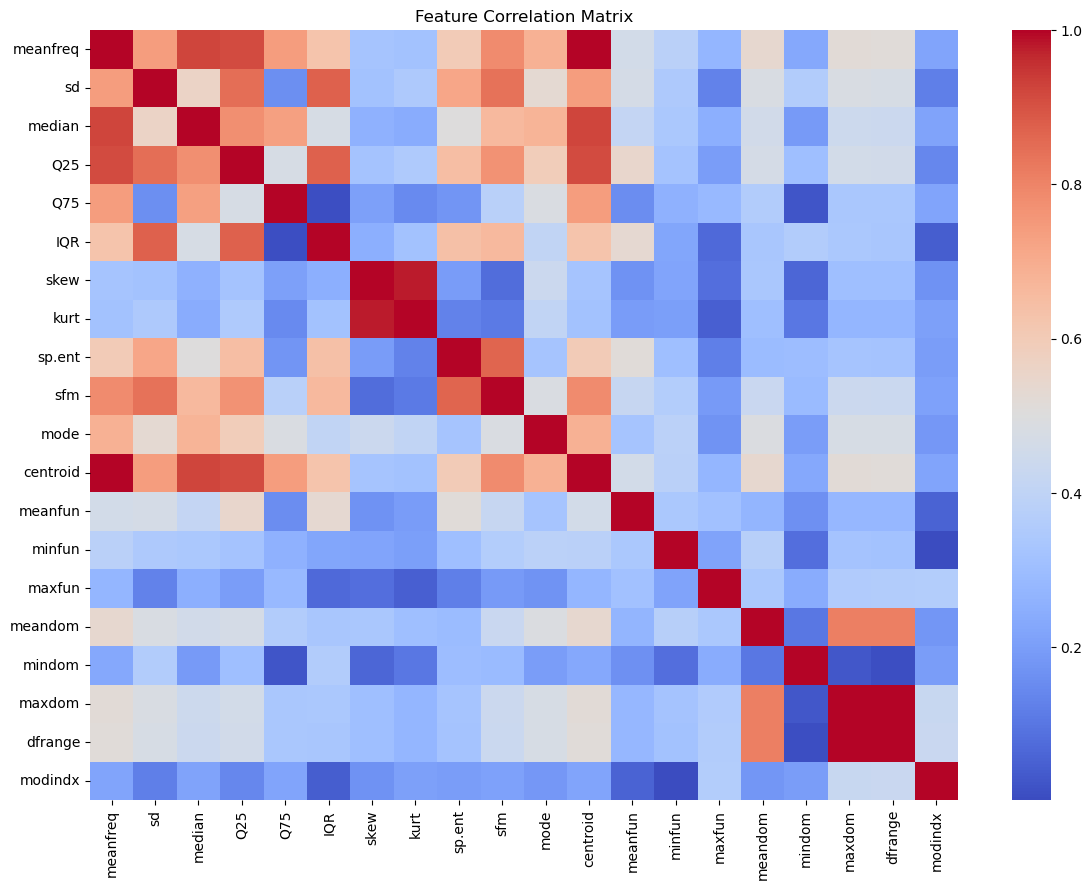

In [10]:
# 3. Compute and plot correlation matrix
corr_matrix = X.corr().abs()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [12]:
# 4. Remove highly correlated features (correlation > 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop correlated features
X_reduced = X.drop(columns=to_drop)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain model
model_red = LogisticRegression(max_iter=1000)
model_red.fit(X_train_red, y_train_red)
y_pred_red = model_red.predict(X_test_red)
reduced_accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Reduced Feature Set Accuracy: {reduced_accuracy:.4f}')
print(f'Features dropped due to high correlation: {to_drop}')

Reduced Feature Set Accuracy: 0.9196
Features dropped due to high correlation: ['median', 'Q25', 'kurt', 'centroid', 'dfrange']
